In [36]:
import requests
import cv2
from base64 import b64encode

def readImage(path):
    img = cv2.imread(path)
    retval, buffer = cv2.imencode('.png', img)
    b64img = b64encode(buffer).decode("utf-8")
    return b64img

b64img = readImage("ex.png")

class controlnetRequest():
    def __init__(self, prompt):
        self.url = "http://localhost:7860/controlnet/txt2img"
        self.body = {
            "prompt": prompt,
            "negative_prompt": "",
            "seed": -1,
            "subseed": -1,
            "subseed_strength": 0,
            "batch_size": 1,
            "n_iter": 1,
            "steps": 15,
            "cfg_scale": 7,
            "width": 512,
            "height": 768,
            "restore_faces": True,
            "eta": 0,
            "sampler_index": "Euler a",
            "controlnet_input_image": [b64img],
            "controlnet_module": 'canny',
            "controlnet_model": 'control_canny-fp16 [e3fe7712]',
            "controlnet_guidance": 1.0,
        }

    def sendRequest(self):
        r = requests.post(self.url, json=self.body)
        return r.json()

js = controlnetRequest("walter white").sendRequest()
print(js)

{'images': ['iVBORw0KGgoAAAANSUhEUgAAAgAAAAMACAIAAADdbUgZAAACYHRFWHRwYXJhbWV0ZXJzAHdhbHRlciB3aGl0ZQpTdGVwczogMTUsIFNhbXBsZXI6IEV1bGVyIGEsIENGRyBzY2FsZTogNy4wLCBTZWVkOiAyNzc1MTE4Nzk1LCBGYWNlIHJlc3RvcmF0aW9uOiBDb2RlRm9ybWVyLCBTaXplOiA1MTJ4NzY4LCBNb2RlbCBoYXNoOiA2Y2UwMTYxNjg5LCBNb2RlbDogdjEtNS1wcnVuZWQtZW1hb25seSwgU2VlZCByZXNpemUgZnJvbTogLTF4LTEsIERlbm9pc2luZyBzdHJlbmd0aDogMCwgQ29udHJvbE5ldCBFbmFibGVkOiBUcnVlLCBDb250cm9sTmV0IFByZXByb2Nlc3NvcjogY2FubnksIENvbnRyb2xOZXQgTW9kZWw6IGNvbnRyb2xfY2FubnktZnAxNiBbZTNmZTc3MTJdLCBDb250cm9sTmV0IFdlaWdodDogMS4wLCBDb250cm9sTmV0IFN0YXJ0aW5nIFN0ZXA6IDAuMCwgQ29udHJvbE5ldCBFbmRpbmcgU3RlcDogMS4wLCBDb250cm9sTmV0IFJlc2l6ZSBNb2RlOiBDcm9wIGFuZCBSZXNpemUsIENvbnRyb2xOZXQgUGl4ZWwgUGVyZmVjdDogRmFsc2UsIENvbnRyb2xOZXQgQ29udHJvbCBNb2RlOiBDb250cm9sTW9kZS5CQUxBTkNFRCwgQ29udHJvbE5ldCBQcmVwcm9jZXNzb3IgUGFyYW1ldGVyczogIig2NCwgNjQuMCwgNjQuMCkiLCBFdGE6IDAuMHIB2X8AAQAASURBVHicZP1JkyTJsi6G6WCTDxGRmVV9zrnvYSAXBEXenv8FIAEQQgghFPLXUigchRsC956hq3KKCHe3SVW5sMjq88hedJVURnqYm6mpfjp9iv/

TypeError: Image data of dtype object cannot be converted to float

<Figure size 640x480 with 0 Axes>

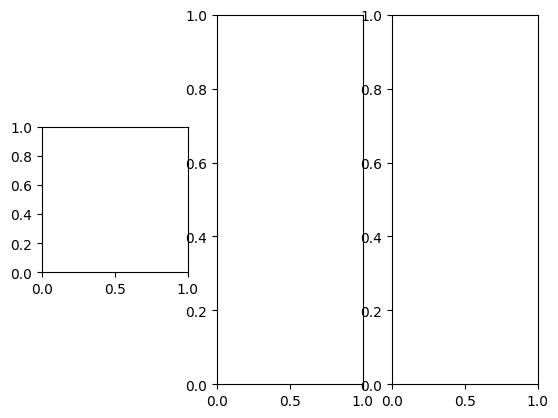

In [37]:
import io, base64
import matplotlib.pyplot as plt
from PIL import Image

pil_img = Image.open('/root/workspace/nahida/0e17302b9bfa15402f783c29c0d1d34f.jpg')
image = Image.open(io.BytesIO(base64.b64decode(js["images"][0])))
mask_image = Image.open(io.BytesIO(base64.b64decode(js["images"][1])))

plt.figure()
f, axarr = plt.subplots(1,3)
axarr[0].imshow(js)
axarr[1].imshow(js)
axarr[2].imshow(js)

In [12]:
def readImage(path):
    img = cv2.imread(path)
    retval, buffer = cv2.imencode('.jpg', img)
    b64img = b64encode(buffer).decode("utf-8")
    return b64img

b64img = readImage("ex.jpg")
print(b64img)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAF1AlwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCj+0F+0F8e9O+PfjiwsPjd4whgh8YanHBBF4mu1SNFu5QqqokwAAMADoOK5H/ho79oX/ovPjP/AMKm8/8AjlM/aN/5OI8e/wDY6ar/AOlktcdQB2n/AA0d+0L/ANF58Z/+FTef/HKP+Gjv2hf+i8+M/wDwqbz/AOOVxdFAHaf8

In [31]:
import io
import cv2
import base64
import requests
# A1111 URL
url = "http://127.0.0.1:7860"

# A1111 payload
payload = {
    "prompt": "maltese puppy",
    "steps": 5
}
# Trigger Generation
response = requests.post(url=f'{url}/sdapi/v1/txt2img', json=payload)

# Read results
r = response.json()

In [34]:
payload = {
    "prompt": "maltese puppy",
    "steps": 5
}
response = requests.post(url=f'http://127.0.0.1:7860/sdapi/v1/txt2img', json=payload)
response

<Response [404]>

In [35]:
import io, base64
import matplotlib.pyplot as plt
from PIL import Image


image = Image.open(io.BytesIO(base64.b64decode("qDdRjvUwcztnG77mxiiunT9HavlSbnW8eZW9h7DZ3W1le0tKPWxtDpcsWlVEU1QwSbjMcSj1VXk2IloemG4myNrNIkkJohzRvPG0XBsFavdG+4aoQwoBvToR1/LUEiTiV2/HXAatLu+F5vk3q8EyamZWA45NNS+7Qxf5YhE1q6PmzL5y5/k4jkNUns/n88efv/z1X0hxd1C8aP7ySvIvn3GtFT6rLd9Kkx2UyDb1bcREqgMupHQ11YyuC8iYrwvHOAb1sMfH45dvf+H3mOsV7pMejrkcFvP1tfw5+ZpyEN/ihdOU5FDBYdf0DLeGz4b/Sh4r7GFy5CyMLrVAsmBQwHtCehEvbkyWRgFuLLmtBSL9v3wtG9l7RFfzPII7mFjECq1QNHhuX3b/Kfuz739CVfIpDhslYyUcNwtqZiu8W88L2pZJti5KT5uAIPczgNu7RTYdT4DOkRJhZkPE6FUSjT6uDTV1pG82/uYHvOsd0py2DAn3tW1MwA0TSbhFtgVNnr/zwuubsQ9TetVso4r2q0hQOkO6Lq2LeOsl3qoZ9hksv07ut+qD3JAC8GddIZ9quyItFNR7ddRf91XFjRNt7Ll/Z0v/BaOtHWXIV96UrLcbIUk4b7vqRSbKDEYQCCBbPydl6kpglnILYKficy/9Fon6PiMokp2VCYZ7eZpIeTIBuHJ208SnSnw/+vQnojorFBVGhli9zlyZgXKDm2BDWFPs7hyzWvCb5bxHo5Lk3yehmHxLIqpZvKqqZiMnI2a4Mr0AiJja1qYg0pUFdf5aGlTRMKpvZUxVgzDb5yUByN13akN1o6hOmFldtFuMaZqotlYmieuS9kgK67Xpfso+qlK8VksmRuk/1aVHDUIzEwEUOX9FxCLit3/++vntkGE+F0My7r+mu0cr3NE+WCYDZfaAIzq6mUf0PoRJiRIbI+9Xks26eyzF4ho0U9VxjI+PD/9zzvkV5LV8Bq/1da2v41DOEeExVwyz40PFfM2h4hx+TYhgmAkismBENvvUpgUgKjmVuSGsCzz28cyDUlmLqd/V+SKRGb9p0vLVuZ/fmCQqJQ/Y+XIbyNnHlRu8cEPQu8XqyGy/VXX4zKeYpCR5QXErqWBjCk8F/K1UZY5ThntzVxSl3lusBttISYs7CgAxFYfo4FgwhaPazaNitzvXqI2BNH9/g/VNwGoZkxi93bSgSXEdcqlgRa6N7Jex/8vGIXKvODsXFBWrkPZGWFGs4mpl6InOpM53DkF1UJCi8B0lKcu6P/T+knqjLoS+d339NbdNDumtMOkb1m97tL/7vnL9l1pj6RTGTUnuZ725sXQR3zahVRkpGr3eUXJu/Z2ZvN3BNDLxP6sZe9n6jrbOpgWpoJAiVqXTRfe0fQYAoGa2HIGoPyvzPwgPuldhTPrFEfWmzccEkMykQaZZJJUKQWhH91uoumG/Fi05Rnf1SpE3qU0BoolljBdiKZWoZchXbZT8X3As2ma3MaG4iaAqUQlKRYWZmUVCilCEFWLOQiCpPJAQsXIdU+ChME1g0n8REUs7AkFetqqlAcgUT+nQtIqpmSRHFKADAxATGRSDKHsGgJrmYEqTAY5Dz4/zr//+H/8DkPPjLx462/xDyCG+SMEKuseKWGuttejuvhiMcHpkSTCbltlIBVlFJEJMdTHOyJ6VBpCK9bquS3759i1EaIEBB13izx9fX6+nnfbn12utH/N1qQlp84rQ+fj8Nv3KIuflS0RAWdfMYjiFIQvkRSXujcgbdIrN5x4ElVAyusdDxwLyGYe0t15MHDS0AOFZVMFuWhLFkrYkgT6K3eNJmiILmiL/F0DZxwtFR1n5/oRSzvNMqy+Sim64kxnOR3YEzzl3+fYF6wkwml0Ds2Es0CAvIGufq4JQrTIFHSmQupH/P41+kBcMdLXIAAAAAElFTkSuQmCC")))
mask_image = Image.open(io.BytesIO(base64.b64decode("qDdRjvUwcztnG77mxiiunT9HavlSbnW8eZW9h7DZ3W1le0tKPWxtDpcsWlVEU1QwSbjMcSj1VXk2IloemG4myNrNIkkJohzRvPG0XBsFavdG+4aoQwoBvToR1/LUEiTiV2/HXAatLu+F5vk3q8EyamZWA45NNS+7Qxf5YhE1q6PmzL5y5/k4jkNUns/n88efv/z1X0hxd1C8aP7ySvIvn3GtFT6rLd9Kkx2UyDb1bcREqgMupHQ11YyuC8iYrwvHOAb1sMfH45dvf+H3mOsV7pMejrkcFvP1tfw5+ZpyEN/ihdOU5FDBYdf0DLeGz4b/Sh4r7GFy5CyMLrVAsmBQwHtCehEvbkyWRgFuLLmtBSL9v3wtG9l7RFfzPII7mFjECq1QNHhuX3b/Kfuz739CVfIpDhslYyUcNwtqZiu8W88L2pZJti5KT5uAIPczgNu7RTYdT4DOkRJhZkPE6FUSjT6uDTV1pG82/uYHvOsd0py2DAn3tW1MwA0TSbhFtgVNnr/zwuubsQ9TetVso4r2q0hQOkO6Lq2LeOsl3qoZ9hksv07ut+qD3JAC8GddIZ9quyItFNR7ddRf91XFjRNt7Ll/Z0v/BaOtHWXIV96UrLcbIUk4b7vqRSbKDEYQCCBbPydl6kpglnILYKficy/9Fon6PiMokp2VCYZ7eZpIeTIBuHJ208SnSnw/+vQnojorFBVGhli9zlyZgXKDm2BDWFPs7hyzWvCb5bxHo5Lk3yehmHxLIqpZvKqqZiMnI2a4Mr0AiJja1qYg0pUFdf5aGlTRMKpvZUxVgzDb5yUByN13akN1o6hOmFldtFuMaZqotlYmieuS9kgK67Xpfso+qlK8VksmRuk/1aVHDUIzEwEUOX9FxCLit3/++vntkGE+F0My7r+mu0cr3NE+WCYDZfaAIzq6mUf0PoRJiRIbI+9Xks26eyzF4ho0U9VxjI+PD/9zzvkV5LV8Bq/1da2v41DOEeExVwyz40PFfM2h4hx+TYhgmAkismBENvvUpgUgKjmVuSGsCzz28cyDUlmLqd/V+SKRGb9p0vLVuZ/fmCQqJQ/Y+XIbyNnHlRu8cEPQu8XqyGy/VXX4zKeYpCR5QXErqWBjCk8F/K1UZY5ThntzVxSl3lusBttISYs7CgAxFYfo4FgwhaPazaNitzvXqI2BNH9/g/VNwGoZkxi93bSgSXEdcqlgRa6N7Jex/8vGIXKvODsXFBWrkPZGWFGs4mpl6InOpM53DkF1UJCi8B0lKcu6P/T+knqjLoS+d339NbdNDumtMOkb1m97tL/7vnL9l1pj6RTGTUnuZ725sXQR3zahVRkpGr3eUXJu/Z2ZvN3BNDLxP6sZe9n6jrbOpgWpoJAiVqXTRfe0fQYAoGa2HIGoPyvzPwgPuldhTPrFEfWmzccEkMykQaZZJJUKQWhH91uoumG/Fi05Rnf1SpE3qU0BoolljBdiKZWoZchXbZT8X3As2ma3MaG4iaAqUQlKRYWZmUVCilCEFWLOQiCpPJAQsXIdU+ChME1g0n8REUs7AkFetqqlAcgUT+nQtIqpmSRHFKADAxATGRSDKHsGgJrmYEqTAY5Dz4/zr//+H/8DkPPjLx462/xDyCG+SMEKuseKWGuttejuvhiMcHpkSTCbltlIBVlFJEJMdTHOyJ6VBpCK9bquS3759i1EaIEBB13izx9fX6+nnfbn12utH/N1qQlp84rQ+fj8Nv3KIuflS0RAWdfMYjiFIQvkRSXujcgbdIrN5x4ElVAyusdDxwLyGYe0t15MHDS0AOFZVMFuWhLFkrYkgT6K3eNJmiILmiL/F0DZxwtFR1n5/oRSzvNMqy+Sim64kxnOR3YEzzl3+fYF6wkwml0Ds2Es0CAvIGufq4JQrTIFHSmQupH/P41+kBcMdLXIAAAAAElFTkSuQmCC")))

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(mask_image)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000023733D76930>

In [38]:
from ImageCoder import *
readImage(r"C:\Users\erik_\Desktop\photo_2023-05-18_20-55-33.jpg")

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAMXBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2L9vn9vj9sf4a/ti/EDwJ4E/aD17StH0rXXg07T7WZPLgjx0Ge1eQ/wDDzL9vH/o5/wATf9/xR/wUu/5P0+KH/YzP/KvC6APdP+HmX7eP/Rz/AIm/7/ij/h5l+3j/ANHP+Jv+/wCK8LooA90/4eZft4/9HP8Aib/v+KP+HmX